In [1]:

import pandas as pd
import numpy as np


In [2]:


import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [3]:

import matplotlib 
## import pytorch_lightning as pl
import torch 

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable


In [4]:

## Requires Python = 3.9


In [5]:

for_RNN_data_CIVS = pd.read_csv('merged_seq_5998_CIVS.csv')


In [6]:

for_RNN_data_CIVS.head(5)


,pd_index,date_f1,CNUM,LNUM_f1,SI_f1,S_f1,MN_f1,P_f1,CU_f1,NI_f1,...,Cast_Avg_Ti_f2,Slag_Fe_f2,Slag_SiO2_f2,Slag_Al2O3_f2,Slag_CaO_f2,Slag_MgO_f2,Slag_S_f2,Slag_K2O_f2,Slag_B_SiO2_f2,Slag_TiO2_f2
0,0,44409,2809,182,1.152,0.042,0.577,0.077,0.003,0.020,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
1,1,44409,2809,171,0.932,0.053,0.521,0.071,0.003,0.015,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
2,2,44409,2809,122,1.059,0.043,0.540,0.076,0.003,0.020,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
3,3,44409,2810,147,0.917,0.059,0.478,0.072,0.003,0.017,...,0.024,0.05,36.020000,6.70,37.209999,9.71,1.15,0.30,1.30,0.34
4,4,44409,2810,190,1.023,0.054,0.508,0.072,0.003,0.012,...,0.024,0.05,36.020000,6.70,37.209999,9.71,1.15,0.30,1.30,0.34


In [7]:

for_RNN_data_CIVS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5998 entries, 0 to 5997
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pd_index                5998 non-null   int64  
 1   date_f1                 5998 non-null   int64  
 2   CNUM                    5998 non-null   int64  
 3   LNUM_f1                 5998 non-null   int64  
 4   SI_f1                   5489 non-null   float64
 5   S_f1                    5479 non-null   float64
 6   MN_f1                   5998 non-null   float64
 7   P_f1                    5998 non-null   float64
 8   CU_f1                   5998 non-null   float64
 9   NI_f1                   5998 non-null   float64
 10  CR_f1                   5998 non-null   float64
 11  MO_f1                   5998 non-null   float64
 12  TI_f1                   5998 non-null   float64
 13  HM_Temp_f1              5998 non-null   int64  
 14  ProbeSi_f1              6 non-null      

<Axes: >

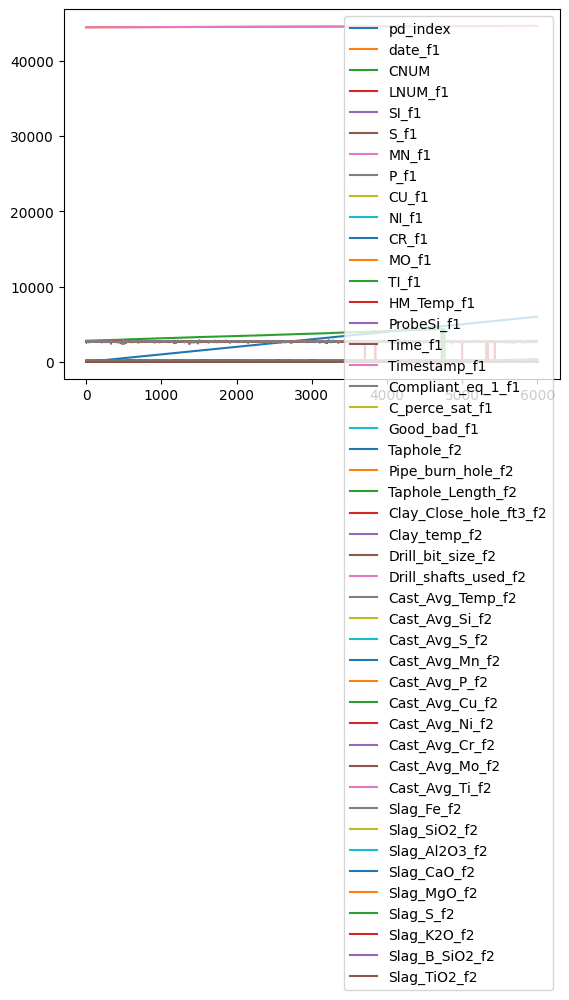

In [8]:

for_RNN_data_CIVS.plot()


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

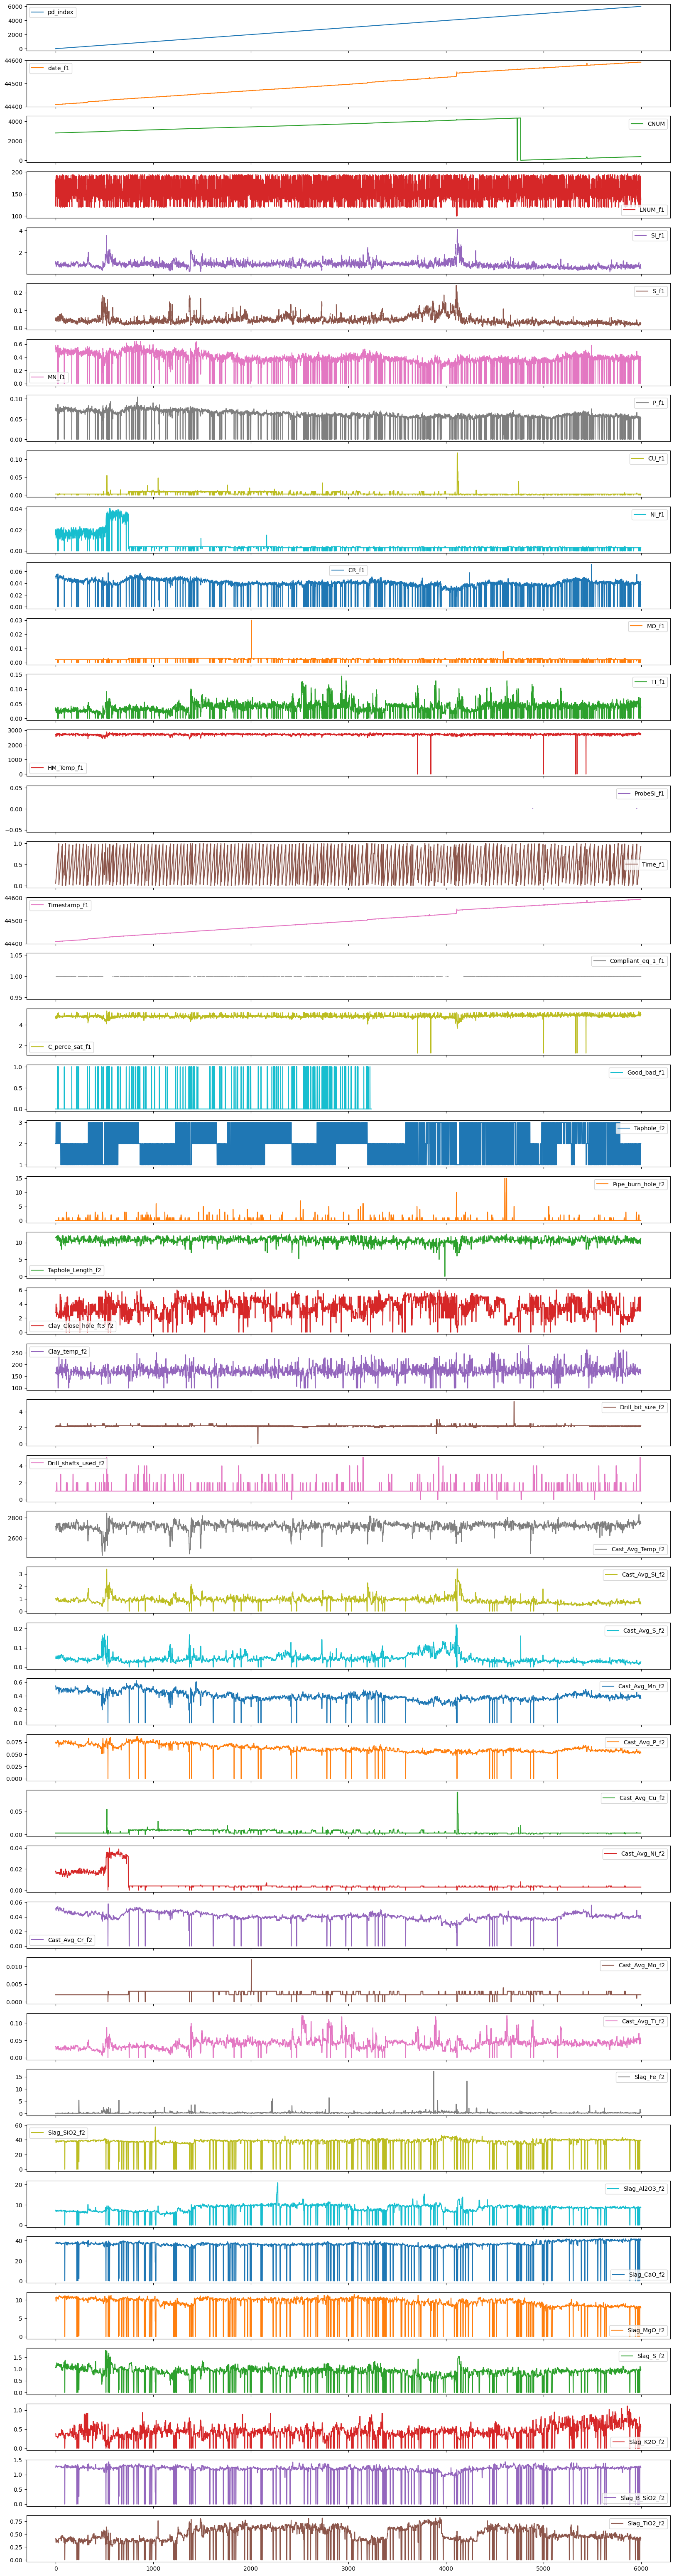

In [9]:

for_RNN_data_CIVS.plot( figsize=(20,80),  subplots=True   )


In [10]:

for_RNN_data_CIVS


,pd_index,date_f1,CNUM,LNUM_f1,SI_f1,S_f1,MN_f1,P_f1,CU_f1,NI_f1,...,Cast_Avg_Ti_f2,Slag_Fe_f2,Slag_SiO2_f2,Slag_Al2O3_f2,Slag_CaO_f2,Slag_MgO_f2,Slag_S_f2,Slag_K2O_f2,Slag_B_SiO2_f2,Slag_TiO2_f2
0,0,44409,2809,182,1.152,0.042,0.577,0.077,0.003,0.020,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
1,1,44409,2809,171,0.932,0.053,0.521,0.071,0.003,0.015,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
2,2,44409,2809,122,1.059,0.043,0.540,0.076,0.003,0.020,...,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41
3,3,44409,2810,147,0.917,0.059,0.478,0.072,0.003,0.017,...,0.024,0.05,36.020000,6.70,37.209999,9.71,1.15,0.30,1.30,0.34
4,4,44409,2810,190,1.023,0.054,0.508,0.072,0.003,0.012,...,0.024,0.05,36.020000,6.70,37.209999,9.71,1.15,0.30,1.30,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5993,5993,44592,379,120,0.795,0.019,0.397,0.054,0.003,0.003,...,0.052,0.51,39.639999,8.66,41.150002,8.27,0.93,0.63,1.25,0.44
5994,5994,44592,379,121,NaN,NaN,0.000,0.000,0.000,0.000,...,0.052,0.51,39.639999,8.66,41.150002,8.27,0.93,0.63,1.25,0.44
5995,5995,44592,380,163,0.598,0.025,0.383,0.054,0.003,0.003,...,0.041,0.32,39.090000,8.67,40.560001,7.86,0.99,0.56,1.24,0.42
5996,5996,44592,380,146,0.608,0.030,0.351,0.052,0.003,0.003,...,0.041,0.32,39.090000,8.67,40.560001,7.86,0.99,0.56,1.24,0.42


In [11]:

for_RNN_data_CIVS['date_f2'][100:400]


100     8/3/2021 0:00
101     8/3/2021 0:00
102     8/3/2021 0:00
103     8/3/2021 0:00
104     8/3/2021 0:00
            ...      
395    8/14/2021 0:00
396    8/14/2021 0:00
397    8/14/2021 0:00
398    8/14/2021 0:00
399    8/14/2021 0:00
Name: date_f2, Length: 300, dtype: object

In [12]:

my_cols = ['date_f1', 'date_f2', 'SI_f1', 'HM_Temp_f1', 'Slag_CaO_f2', 'Cast_Avg_Si_f2', 'Slag_SiO2_f2',
           'Slag_B_SiO2_f2', 'Time_f1', 'C_perce_sat_f1', 'Cast_Avg_Temp_f2', 'Clay_temp_f2']



In [13]:

df2 = for_RNN_data_CIVS.loc[:, my_cols ]


In [14]:

df2


,date_f1,date_f2,SI_f1,HM_Temp_f1,Slag_CaO_f2,Cast_Avg_Si_f2,Slag_SiO2_f2,Slag_B_SiO2_f2,Time_f1,C_perce_sat_f1,Cast_Avg_Temp_f2,Clay_temp_f2
0,44409,8/1/2021 0:00,1.152,2677,37.610001,1.048,38.709999,1.25,0.057639,4.692156,2714,165
1,44409,8/1/2021 0:00,0.932,2729,37.610001,1.048,38.709999,1.25,0.086111,4.830898,2714,165
2,44409,8/1/2021 0:00,1.059,2736,37.610001,1.048,38.709999,1.25,0.131250,4.804690,2714,165
3,44409,8/1/2021 0:00,0.917,2557,37.209999,0.906,36.020000,1.30,0.145833,4.587464,2677,160
4,44409,8/1/2021 0:00,1.023,2705,37.209999,0.906,36.020000,1.30,0.170139,4.768184,2677,160
...,...,...,...,...,...,...,...,...,...,...,...,...
5993,44592,1/31/2022 0:00,0.795,2765,41.150002,0.721,39.639999,1.25,0.838889,4.940506,2739,176
5994,44592,1/31/2022 0:00,NaN,2772,41.150002,0.721,39.639999,1.25,0.870833,5.211540,2739,176
5995,44592,1/31/2022 0:00,0.598,2746,40.560001,0.584,39.090000,1.24,0.895833,4.973084,2747,160
5996,44592,1/31/2022 0:00,0.608,2748,40.560001,0.584,39.090000,1.24,0.902778,4.970318,2747,160


In [15]:

df_si = df2['SI_f1']


In [16]:

df_si


0       1.152
1       0.932
2       1.059
3       0.917
4       1.023
        ...  
5993    0.795
5994      NaN
5995    0.598
5996    0.608
5997    0.547
Name: SI_f1, Length: 5998, dtype: float64

In [17]:

def one_step_forecast(df, window):
    d = df.values
    x = []
    n = len(df)
    idx = df.index[:-window]
    for start in range(n-window):
        end = start + window
        x.append(d[start:end])
    cols = [f'x_{i}' for i in range(1, window+1)]
    x = np.array(x).reshape(n-window, -1)
    y = df.iloc[window:].values
    df_xs = pd.DataFrame(x, columns=cols, index=idx)
    df_y = pd.DataFrame(y.reshape(-1), columns=['y'], index=idx)
    return pd.concat([df_xs, df_y], axis=1).dropna()


In [18]:

window = 1     ## 10

res_df = one_step_forecast(df_si, window)


In [19]:

res_df


,x_1,y
0,1.152,0.932
1,0.932,1.059
2,1.059,0.917
3,0.917,1.023
4,1.023,0.967
...,...,...
5990,0.696,0.915
5991,0.915,0.646
5992,0.646,0.795
5995,0.598,0.608



## RNN


In [20]:

def split_data(df, test_split=0.20):
    n = int(len(df) * test_split)
    train, test = df[:-n], df[-n:]
    return train, test


In [21]:

print(res_df.shape)


(5099, 2)


In [22]:

class Standardize:
    
    def __init__(self, df, split=0.10):
        self.data = df
        self.split = split
    
    def split_data(self):
        n = int(len(self.data) * self.split)
        train, test = self.data.iloc[:-n], self.data.iloc[-n:]
        n = int(len(train) * self.split)
        train, val = train.iloc[:-n], train.iloc[-n:]
        assert len(test) + len(train) + len(val) == len(self.data)
        return train, test, val
    
    def _transform(self, data):
        data_s = (data - self.mu)/self.sigma
        return data_s
    
    def fit_transform(self):
        train, test, val = self.split_data()
        self.mu, self.sigma = train.mean(), train.std()
        train_s = self._transform(train)
        test_s = self._transform(test)
        val_s = self._transform(val)
        return train_s, test_s, val_s
    
    def inverse(self, data):
        return (data * self.sigma)+self.mu
        
    def inverse_y(self, data):
        return (data * self.sigma[-1])+self.mu[-1]


In [23]:

scale_civs = Standardize(res_df)


In [24]:

train_si, test_si, val_si = scale_civs.fit_transform()


In [25]:

print(f'''
SI: train: {len(train_si)} , test: {len(test_si)}, val:{len(val_si)}
''')



SI: train: 4131 , test: 509, val:459



In [26]:

def features_target_pt(*args):
    
    y = [torch.from_numpy(col.pop('y').values.reshape(-1,1)).float() for col in args]
    x = [torch.from_numpy(col.values.reshape(*col.shape, 1)).float() for col in args]
    
    return *y, *x


In [27]:

numpy_array = train_si.values
type(numpy_array)


numpy.ndarray


## To convert to torch tensors


In [28]:

torch_tensor = torch.from_numpy(numpy_array)
type(torch_tensor)


torch.Tensor

In [29]:

from_torch_to_numpy = torch_tensor.detach().numpy()
type(from_torch_to_numpy)


numpy.ndarray

In [30]:

(y_train_si, 
 y_val_si, 
 y_test_si, 
 x_train_si, 
 x_val_si, 
 x_test_si) = features_target_pt(train_si, 
                                 val_si, 
                                 test_si)




In [31]:

# returns a Tensor object
type(x_test_si)


torch.Tensor

In [32]:

y_train_si.shape


torch.Size([4131, 1])

In [33]:

x_train_si.shape


torch.Size([4131, 1, 1])


## Normal RNN


In [34]:

class RNN(nn.Module):
    def __init__(self, input_size, output_size, n_features, n_layers):
        super(RNN, self).__init__()
        self.n_layers = n_layers
        self.hidden_dim = n_features
        self.rnn = nn.RNN(input_size, n_features, n_layers, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(n_features, output_size)
        
    def forward(self, x, hn):
        # batch_first=True -> (batch_size, seq_length, input_size)
        x = x.view(1, x.shape[0], x.shape[1])
        rnn_o, hn = self.rnn(x, hn)
        rnn_o = self.dropout(rnn_o)
        # reshape
        rnn_o = rnn_o.view(-1, self.hidden_dim)
        output = self.fc(rnn_o)
        return output, hn

    def init_hidden(self):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, 1, self.hidden_dim).zero_()
        return hidden


In [35]:

issubclass(RNN, nn.Module)


True

In [36]:

issubclass(RNN, nn.RNN)


False

In [37]:

def train_model_pt(model_type='RNN', **kwargs):
    """
    Parameters:
        input_size: input size
        output_size: output size
        n_features: number of features (hidden dimension)
        n_layers: number of layers
        train_data: tuple ex (x_train, y_train)
        val_data: tuple ex (x_val, y_val)
        epochs: number of epochs
        print_every: output and history tracking
        lr: learning rate
    """
    if model_type=='RNN':
        model = RNN(kwargs['input_size'], 
                    kwargs['output_size'], 
                    kwargs['units'], 
                    kwargs['n_layers'])
    elif model_type=='LSTM':
        model = LSTM(kwargs['input_size'], 
                    kwargs['output_size'], 
                    kwargs['units'], 
                    kwargs['n_layers'])
    elif model_type=='GRU':
         model = LSTM(kwargs['input_size'], 
                    kwargs['output_size'], 
                    kwargs['units'], 
                    kwargs['n_layers'])
        
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=kwargs['lr'])
    
    x_train, y_train = kwargs['train_data']
    x_val, y_val  = kwargs['val_data']
    x_test, y_test = kwargs['test_data']
    
    history = {'loss': [], 'val_loss': []}
    # batch_size = x_train.shape[0]
    model.train()
    epochs = kwargs['epochs']
    print_every = kwargs['print_every']
    
    for batch_i, epoch in enumerate(range(epochs)):
        h = model.init_hidden()
        optimizer.zero_grad()
        pred, h = model(x_train, h) #model(x_train)
        #hidden = hidden.data
        loss = criterion(pred, y_train)        
        loss.backward()
        optimizer.step()
        if batch_i % print_every == 0:
            model.eval()
            with torch.no_grad():
                val_h = model.init_hidden()
                val_p, val_h = model(x_val, val_h)
                val_loss = criterion(val_p, y_val)
                history['val_loss'].append(val_loss.item())
            model.train()
            history['loss'].append(loss.item())
            print(f'{batch_i}/{epochs} - Loss:  {loss.item()}, val_loss: {val_loss.item()}')
    
    ## Prediction
    model.eval()
    with torch.no_grad():
        h0 = model.init_hidden()
        y_hat = model(x_test, h0)
    y_hat, _ = y_hat
    mse_loss_air = criterion(y_hat, y_test)
    print(f'Test MSE Loss: {mse_loss_air.item():.4f}')
    
    ## Plotting
    fig, ax = plt.subplots(2, 1) 

    ax[0].set_title(f'{model_type}: Loss and Validation Loss per epoch')
    ax[0].plot(history['loss'], 'k--', label='loss')
    ax[0].plot(history['val_loss'], 'k', label='val_loss')
    ax[0].legend()
    ax[1].set_title(f"{model_type} TEST MSE = {mse_loss_air.item():.4f}: Forecast vs Actual (Out-of-Sample data)")
    scale = kwargs['scale']
    actual = scale.inverse_y(y_test.detach().numpy().ravel())
    pred = scale.inverse_y(y_hat.detach().numpy().ravel())
    idx = kwargs['idx']
    ##pd.Series(actual, index=idx).plot(style='k--', label='actual', alpha=0.65, color='blue')
    ##pd.Series(pred,   index=idx).plot(style='k',   label='forecast' , color='red')
    pd.Series(actual, index=idx).plot( label='actual',    color='blue')
    pd.Series(pred,   index=idx).plot( label='forecast' , color='red' )
    fig.tight_layout()
    ax[1].legend(); plt.show()
    
    return model, history


In [38]:

params_si = {
'input_size':x_train_si.shape[1],
'output_size':1,
'units':32,
'n_layers':1,
'epochs': 500,
'print_every': 25,
'lr': 0.01,
'train_data': (x_train_si, y_train_si),
'val_data': (x_val_si, y_val_si),
'test_data': (x_test_si, y_test_si),
'idx': test_si.index,
'scale': scale_civs
}


In [39]:

plt.rcParams["figure.figsize"] = [14, 5] 


0/500 - Loss:  0.8646979928016663, val_loss: 0.6666625738143921
25/500 - Loss:  0.3774260878562927, val_loss: 0.19484421610832214
50/500 - Loss:  0.36043062806129456, val_loss: 0.20287984609603882
75/500 - Loss:  0.3591121435165405, val_loss: 0.20274733006954193
100/500 - Loss:  0.34866300225257874, val_loss: 0.2121177464723587
125/500 - Loss:  0.34733152389526367, val_loss: 0.19665341079235077
150/500 - Loss:  0.3493086099624634, val_loss: 0.19406269490718842
175/500 - Loss:  0.3463268578052521, val_loss: 0.19534561038017273
200/500 - Loss:  0.3448179066181183, val_loss: 0.1834034025669098
225/500 - Loss:  0.33963659405708313, val_loss: 0.1933503895998001
250/500 - Loss:  0.33267346024513245, val_loss: 0.17238569259643555
275/500 - Loss:  0.32591310143470764, val_loss: 0.18998795747756958
300/500 - Loss:  0.31887561082839966, val_loss: 0.20037969946861267
325/500 - Loss:  8.285375595092773, val_loss: 5.378391265869141
350/500 - Loss:  1.7053589820861816, val_loss: 1.2807632684707642
3

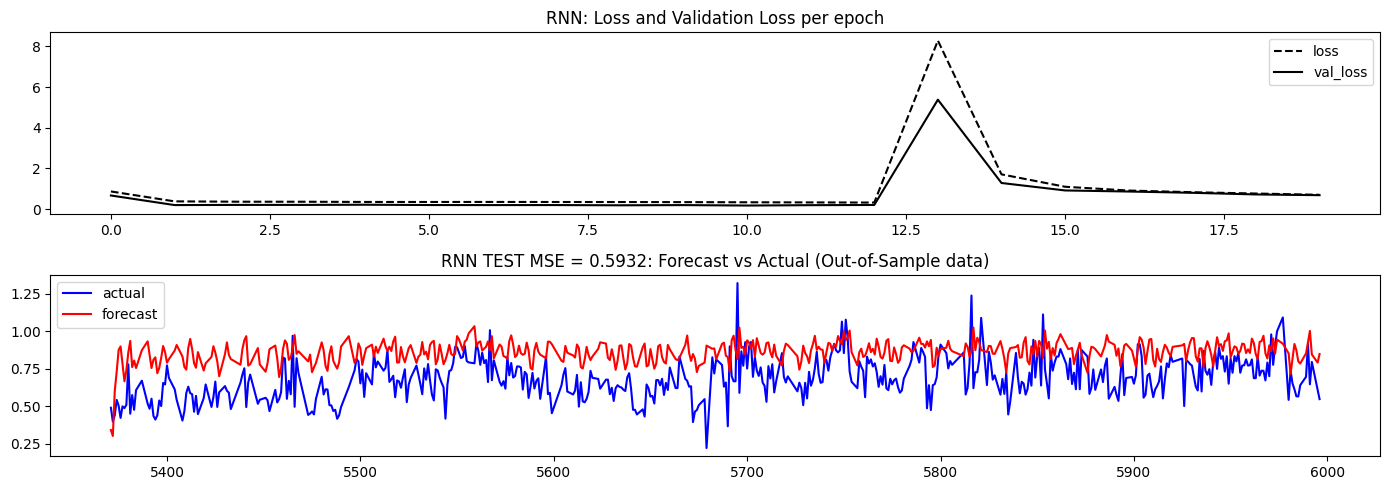

In [40]:

si_rnn, history_a_rnn = train_model_pt('RNN', **params_si)



## LSTM


In [41]:

class LSTM(nn.Module):
    def __init__(self, input_size, output_size, n_features, n_layers):
        super(LSTM, self).__init__()
        self.n_layers = n_layers
        self.hidden_dim = n_features
        self.lstm = nn.LSTM(input_size, n_features, n_layers, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(n_features, output_size)
        
    def forward(self, x, hn):
        # batch_first=True -> (batch_size, seq_length, input_size)
        x = x.view(1, x.shape[0], x.shape[1])
        lstm_o, hn = self.lstm(x, hn)
        lstm_o = self.dropout(lstm_o)
        # reshape
        lstm_o = lstm_o.view(-1, self.hidden_dim)
        output = self.fc(lstm_o)
        return output, hn

    def init_hidden(self):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, 1, self.hidden_dim).zero_(),
                  weight.new(self.n_layers, 1, self.hidden_dim).zero_())
        return hidden


0/500 - Loss:  1.0633643865585327, val_loss: 1.1788852214813232
25/500 - Loss:  0.3963348865509033, val_loss: 0.2569510042667389
50/500 - Loss:  0.3553643226623535, val_loss: 0.1903282254934311
75/500 - Loss:  0.3477417230606079, val_loss: 0.1870374232530594
100/500 - Loss:  0.3332120180130005, val_loss: 0.17813228070735931
125/500 - Loss:  0.331695556640625, val_loss: 0.16450589895248413
150/500 - Loss:  0.32825967669487, val_loss: 0.17144981026649475
175/500 - Loss:  0.3282870352268219, val_loss: 0.1642981618642807
200/500 - Loss:  0.3131565451622009, val_loss: 0.16387096047401428
225/500 - Loss:  0.3026580810546875, val_loss: 0.16842077672481537
250/500 - Loss:  0.30047568678855896, val_loss: 0.16501593589782715
275/500 - Loss:  0.2971639931201935, val_loss: 0.16662092506885529
300/500 - Loss:  0.29397067427635193, val_loss: 0.15877744555473328
325/500 - Loss:  0.28789448738098145, val_loss: 0.1619449257850647
350/500 - Loss:  0.29776376485824585, val_loss: 0.17701683938503265
375/5

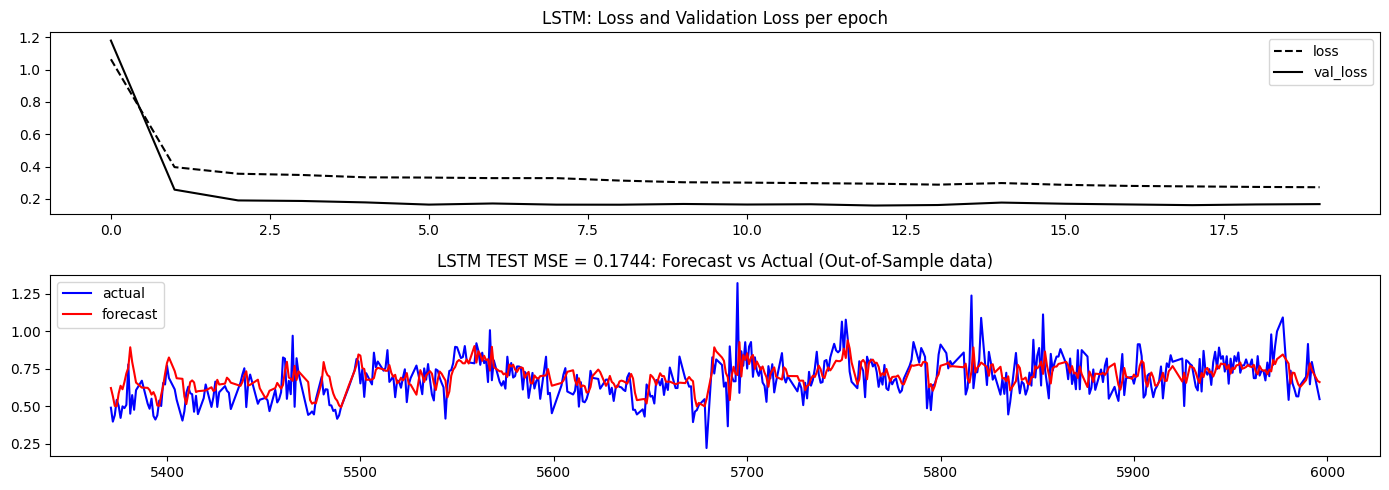

In [42]:

si_lstm, history_a_lstm = train_model_pt('LSTM', **params_si)



## LSTM with Dropout


In [43]:

class LSTM(nn.Module):
    def __init__(self, input_size, output_size, n_features, n_layers):
        super(LSTM, self).__init__()
        self.n_layers = n_layers
        self.hidden_dim = n_features
        self.lstm = nn.LSTM(input_size, n_features, n_layers, batch_first=True, dropout=0.70)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(n_features, output_size)
        
    def forward(self, x, hn):
        # batch_first=True -> (batch_size, seq_length, input_size)
        x = x.view(1, x.shape[0], x.shape[1])
        lstm_o, hn = self.lstm(x, hn)
        lstm_o = self.dropout(lstm_o)
        # reshape
        lstm_o = lstm_o.view(-1, self.hidden_dim)
        output = self.fc(lstm_o)
        return output, hn

    def init_hidden(self):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, 1, self.hidden_dim).zero_(),
                  weight.new(self.n_layers, 1, self.hidden_dim).zero_())
        return hidden


0/500 - Loss:  0.988537609577179, val_loss: 1.0874624252319336
25/500 - Loss:  0.37346595525741577, val_loss: 0.25372782349586487
50/500 - Loss:  0.3469880223274231, val_loss: 0.18193145096302032
75/500 - Loss:  0.33458176255226135, val_loss: 0.1774100810289383
100/500 - Loss:  0.3389293849468231, val_loss: 0.18593615293502808
125/500 - Loss:  0.32548895478248596, val_loss: 0.18074674904346466
150/500 - Loss:  0.3167506456375122, val_loss: 0.16334548592567444
175/500 - Loss:  0.31000614166259766, val_loss: 0.16895101964473724
200/500 - Loss:  0.3053912818431854, val_loss: 0.17147226631641388
225/500 - Loss:  0.3040502965450287, val_loss: 0.17122520506381989
250/500 - Loss:  0.29469558596611023, val_loss: 0.1702057421207428
275/500 - Loss:  0.2926892638206482, val_loss: 0.16232924163341522
300/500 - Loss:  0.2873815596103668, val_loss: 0.1590612232685089
325/500 - Loss:  0.28687816858291626, val_loss: 0.17329703271389008
350/500 - Loss:  0.2830726206302643, val_loss: 0.16666223108768463

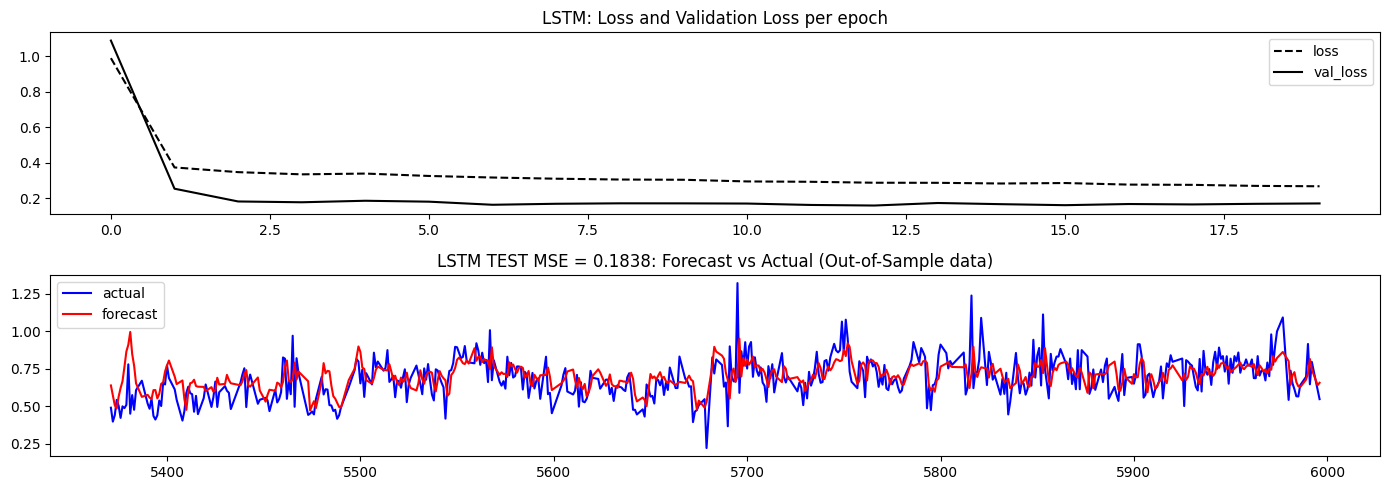

In [44]:

si_lstm_d, history_si_lstm_d = train_model_pt('LSTM', **params_si)



## GRU


In [45]:

class GRU(nn.Module):
    def __init__(self, input_size, output_size, n_features, n_layers):
        super(GRU, self).__init__()
        self.n_layers = n_layers
        self.hidden_dim = n_features
        self.gru = nn.GRU(input_size, n_features, n_layers, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(n_features, output_size)
        
    def forward(self, x, hn):
        # batch_first=True -> (batch_size, seq_length, input_size)
        x = x.view(1, x.shape[0], x.shape[1])
        gru_o, hn = self.gÇru(x, hn)
        gru_o = self.dropout(gru_o)
        # reshape
        gru_o = gru_o.view(-1, self.hidden_dim)
        output = self.fc(gru_o)
        return output, hn

    def init_hidden(self):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, 1, self.hidden_dim).zero_()
        return hidden


0/500 - Loss:  0.9671647548675537, val_loss: 1.0718659162521362
25/500 - Loss:  0.3672168552875519, val_loss: 0.25118446350097656
50/500 - Loss:  0.36036258935928345, val_loss: 0.1982230395078659
75/500 - Loss:  0.34075507521629333, val_loss: 0.18937961757183075
100/500 - Loss:  0.3397238850593567, val_loss: 0.18480327725410461
125/500 - Loss:  0.33461666107177734, val_loss: 0.16915854811668396
150/500 - Loss:  0.32617804408073425, val_loss: 0.16578136384487152
175/500 - Loss:  0.3227204978466034, val_loss: 0.16705618798732758
200/500 - Loss:  0.3212040662765503, val_loss: 0.17709074914455414
225/500 - Loss:  0.3004065155982971, val_loss: 0.18620695173740387
250/500 - Loss:  0.3059907555580139, val_loss: 0.16374625265598297
275/500 - Loss:  0.3092302680015564, val_loss: 0.1652345508337021
300/500 - Loss:  0.29069992899894714, val_loss: 0.17150911688804626
325/500 - Loss:  0.28397393226623535, val_loss: 0.16746015846729279
350/500 - Loss:  0.28939691185951233, val_loss: 0.17013113200664

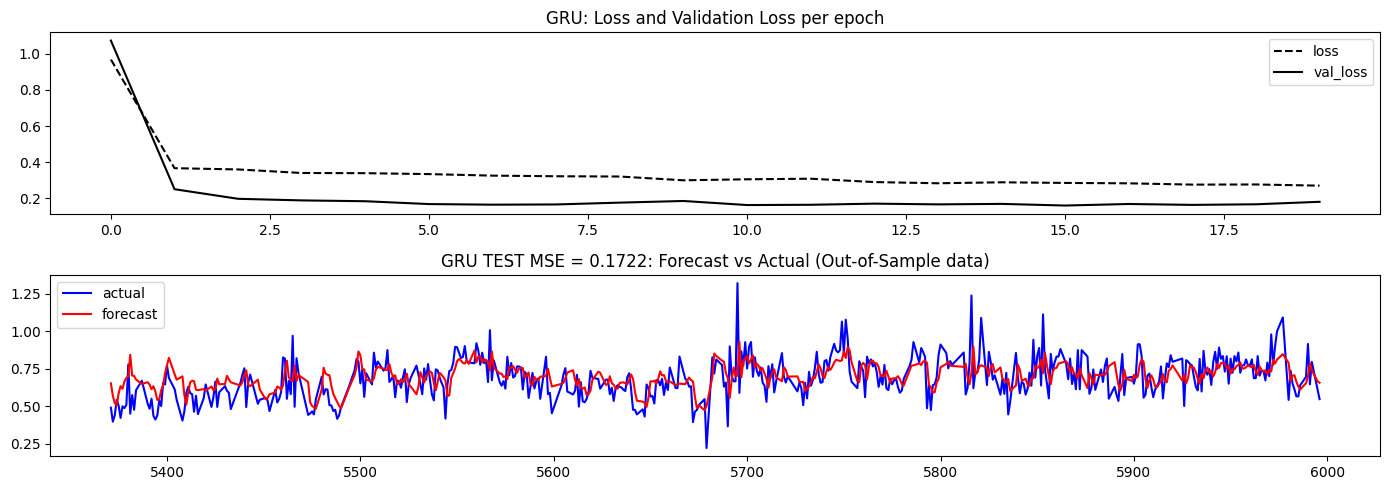

In [46]:

si_gru, history_a_gru = train_model_pt('GRU', **params_si)



## There is more


In [47]:

n_hidden = 32
input_size = x_train_si.shape[1]
n_layers = 1
output = 1


In [48]:

model_lstm_seq = torch.nn.Sequential(
    torch.nn.LSTM(input_size, n_hidden, n_layers),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(n_hidden, output)
)


In [49]:

model_gru_seq = torch.nn.Sequential(
    torch.nn.GRU(input_size, n_hidden, n_layers),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(n_hidden, output)
)


In [50]:

model_lstm_seq


Sequential(
  (0): LSTM(1, 32)
  (1): Dropout(p=0.5, inplace=False)
  (2): Linear(in_features=32, out_features=1, bias=True)
)